# checkpoint 2 - sem. 2

## Módulos

In [1]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# probabilidade
from scipy.stats import expon, norm, t, chi2, f

In [3]:
# amostragem
from sklearn.model_selection import train_test_split

## Dados

In [4]:
dados_atendimentos = pd.read_csv("dados_atendimentos.csv")

In [5]:
dados_atendimentos.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."


In [6]:
dados_renda = pd.read_csv("dados_renda_municipios_2010.csv")

In [7]:
dados_renda.head()

,state,city,RDPC
0,GO,Abadia de Goiás/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,Abadiânia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,Abaeté/MG,707.24


## Funções

- Índice de Gini

Utilizar esta função para calcular o índice de gini para cada estado.

In [8]:
def gini(array: np.ndarray or pd.core.series.Series) -> float:
    """
    Calculates the Gini coefficient of a 1D array.

    Args:
        array (array-like): A 1D array of values.

    Returns:
        float: The Gini coefficient of the array.

    """
    # Convert a pandas series to a numpy array
    if type(array) == pd.core.series.Series:
        array = array.to_numpy()

    # Flatten the array if it is not already 1D
    array = array.flatten()

    # Convert the array to float64 if it is not already
    if array.dtype != np.float64:
        array = np.ascontiguousarray(array, dtype=np.float64)

    # Shift the values in the array so that the minimum value is 0
    if np.amin(array) < 0:
        array -= np.amin(array)

    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

## Questões

## Questão 1 - Na tabela do censo de 2010, obter o índice de Gini por UF(state) (criar um dataframe como df_gini_estado).


In [9]:
df_gini_estado = (
    dados_renda.groupby("state")
    .agg(
        gini=pd.NamedAgg("RDPC", gini),
    )
    .reset_index()
)

df_gini_estado.head()

,state,gini
0,AC,0.195495
1,AL,0.140823
2,AM,0.180262
3,AP,0.177035
4,BA,0.160275


## Questão 2 – Realizar o join das tabelas de atendimento e df_gini_estado.

In [10]:
atendimento_x_gini_estado = pd.merge(
    dados_atendimentos, df_gini_estado, on="state", how="inner"
)
atendimento_x_gini_estado.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,gini
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551
1,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR""",0.132551
2,25,CE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 18:00,165,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551
3,74,CE,0,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,155,500,"""ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE""",0.132551
4,99,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,212,550,"""NAO ENCONTROU DADOS PARA A SELECAO""",0.132551


# Questão 3 – Obter as distribuições de probabilidade (histograma) das variáveis listadas, depois informar qual das distribuições de probabilidade estudadas é mais similar:

**Letra A) Tempo de Acesso**

[]

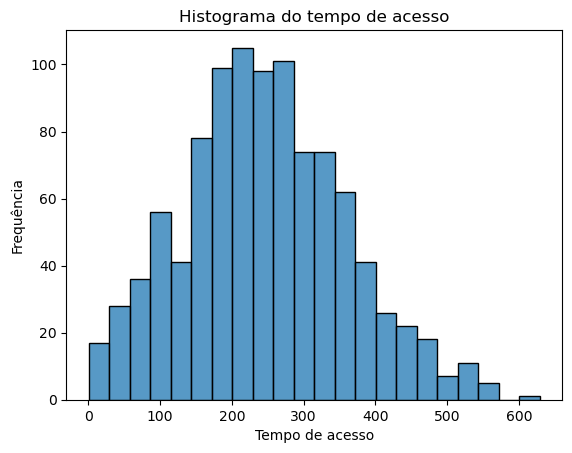

In [11]:
histograma_ta = sns.histplot(dados_atendimentos["tempoAcesso"], kde=False)
histograma_ta.set_title("Histograma do tempo de acesso")
histograma_ta.set_xlabel("Tempo de acesso")
histograma_ta.set_ylabel("Frequência")
histograma_ta.plot()

**Letra B) Gini**

[]

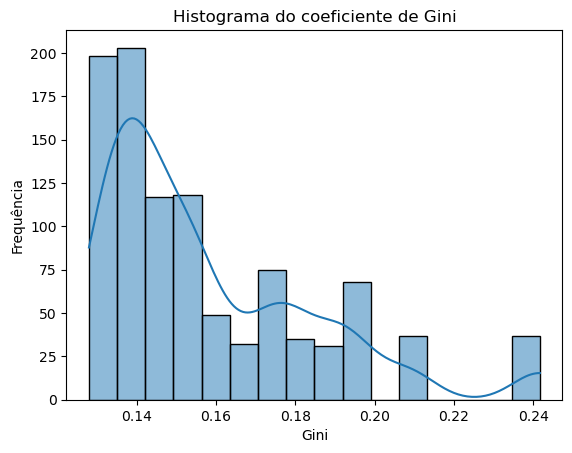

In [12]:
histograma_gi = sns.histplot(atendimento_x_gini_estado["gini"], kde=True)
histograma_gi.set_title("Histograma do coeficiente de Gini")
histograma_gi.set_xlabel("Gini")
histograma_gi.set_ylabel("Frequência")
histograma_gi.plot()

## Questão 4 - Assumindo que tempoAcesso (em segundos) e Gini tendem a seguir uma distribuição de NORMAL. Obtenha as seguintes probabilidades:

In [13]:
tempo_de_acesso = atendimento_x_gini_estado["tempoAcesso"]
tempo_acesso = pd.DataFrame(tempo_de_acesso).describe()
tempo_acesso

,tempoAcesso
count,1000.000000
mean,246.371000
std,112.761565
min,1.000000
25%,171.000000
50%,241.000000
75%,320.000000
max,629.000000


**LETRA A) P(TEMPO ACESSO > 2 MINS)**

In [14]:
probabilidade = 1 - expon.cdf(120, scale=tempo_acesso.loc["mean", "tempoAcesso"])
print(f"Probabilidade do tempo ser maior que 2 minutos: {probabilidade:.2%}")

Probabilidade do tempo ser maior que 2 minutos: 61.44%


**LETRA B) P(1.5 MINS > TEMPO ACESSO > 2 MINS)**

In [15]:
probabilidade = expon.cdf(
    120, scale=tempo_acesso.loc["mean", "tempoAcesso"]
) - expon.cdf(90, scale=tempo_acesso.loc["mean", "tempoAcesso"])
print(f"Probabilidade do tempo estar entre 1,5 e 2 minutos: {probabilidade:.2%}")

Probabilidade do tempo estar entre 1,5 e 2 minutos: 7.96%


**LETRA C) P(TEMPO ACESSO < 0.5 MINS)**

In [16]:
probabilidade = expon.cdf(30, scale=tempo_acesso.loc["mean", "tempoAcesso"])
print(f"Probabilidade do tempo ser menor que 30 segundos: {probabilidade:.2%}")

Probabilidade do tempo ser menor que 30 segundos: 11.46%


**LETRA D) P(GINI > 20%)**

In [17]:
probabilidade = 1 - norm.cdf(
    0.2,
    loc=atendimento_x_gini_estado["gini"].mean(),
    scale=atendimento_x_gini_estado["gini"].std(),
)
print(f"Probabilidade do gini ser maior que 20%: {probabilidade:.2%}")

Probabilidade do gini ser maior que 20%: 6.18%


**LETRA E) P(10% > GINI > 15%)**

In [18]:
probabilidade = norm.cdf(
    0.15,
    loc=atendimento_x_gini_estado["gini"].mean(),
    scale=atendimento_x_gini_estado["gini"].std(),
) - norm.cdf(
    0.1,
    loc=atendimento_x_gini_estado["gini"].mean(),
    scale=atendimento_x_gini_estado["gini"].std(),
)
print(f"Probabilidade do gini estar entre 10 e 15%: {probabilidade:.2%}")

Probabilidade do gini estar entre 10 e 15%: 36.54%


**LETRA F) P(GINI < 12%)**

In [19]:
probabilidade = norm.cdf(
    0.12,
    loc=atendimento_x_gini_estado["gini"].mean(),
    scale=atendimento_x_gini_estado["gini"].std(),
)
print(f"Probabilidade do gini ser menor que 12%: {probabilidade:.2%}")

Probabilidade do gini ser menor que 12%: 7.98%


## Questão 5 – Baseando-se na variável TempoAcesso, qual o tamanho de amostra para realizar um estudo
### Com estes dados? Utilizar margem de erro de 15 segundos e nível de confiança de 95%.

In [20]:
atendimento_x_gini_estado["tempoAcesso"].describe()

count    1000.000000
mean      246.371000
std       112.761565
min         1.000000
25%       171.000000
50%       241.000000
75%       320.000000
max       629.000000
Name: tempoAcesso, dtype: float64

In [21]:
def formula_amostra_continua(N, S, Z, ME):
    n = (Z**2 * S**2 * N) / ((ME**2 * (N - 1)) + (Z**2 * S**2))
    return int(n)

In [22]:
N = 1000
Z = 1.96
S = 112.76
ME = 15

In [23]:
n = formula_amostra_continua(N, S, Z, ME)
n

178

## Questão 6 - Após obter o tamanho de amostra, gerar dois novos dataframes conforme o seguinte:

**letra a) Criar um dataframe chamado df_aas usando amostra aleatória simples**

In [24]:
dados_amostra_simples = atendimento_x_gini_estado.sample(n=n, random_state=1245)

In [25]:
amostra_simples = atendimento_x_gini_estado.agg(
    media_tempoAcesso=pd.NamedAgg("tempoAcesso", "mean"),
    dp_tempoAcesso=pd.NamedAgg("tempoAcesso", "std"),
    N=pd.NamedAgg("tempoAcesso", "count"),
)

In [26]:
amostra_simples = pd.DataFrame(amostra_simples)
df_aas = pd.DataFrame(amostra_simples)
df_aas

,tempoAcesso
media_tempoAcesso,246.371000
dp_tempoAcesso,112.761565
N,1000.000000


**b) Criar um dataframe chamado df_aae usando amostra aleatória estratificada. Utilizar como estrato a variável “avaliacao”.**


In [27]:
dados_amostra_estrat = train_test_split(
    atendimento_x_gini_estado,
    test_size=n,
    random_state=1245,
    stratify=atendimento_x_gini_estado["avaliacao"],
)[1]

In [28]:
amostra_estratificada = dados_amostra_estrat.groupby("avaliacao").agg(
    media_tempoAcesso=pd.NamedAgg("tempoAcesso", "mean"),
    dp_tempoAcesso=pd.NamedAgg("tempoAcesso", "std"),
    N=pd.NamedAgg("tempoAcesso", "count"),
)

amostra_estratificada["percent"] = amostra_estratificada["N"] / sum(
    amostra_estratificada["N"]
)
amostra_estratificada = pd.DataFrame(amostra_estratificada)
df_aae = pd.merge(
    atendimento_x_gini_estado, amostra_estratificada, how="right", on="avaliacao"
)
df_aae

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,gini,media_tempoAcesso,dp_tempoAcesso,N,percent
0,74,CE,0,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,155,500,"""ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE""",0.132551,237.309524,129.397193,42,0.235955
1,99,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,212,550,"""NAO ENCONTROU DADOS PARA A SELECAO""",0.132551,237.309524,129.397193,42,0.235955
2,155,CE,0,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,226,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.132551,237.309524,129.397193,42,0.235955
3,343,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:04,441,500,"""CLIENTE NAO CADASTRADO""",0.132551,237.309524,129.397193,42,0.235955
4,462,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,198,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551,237.309524,129.397193,42,0.235955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,494,PA,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:57,109,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.208619,233.800000,88.355326,45,0.252809
996,502,PA,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:58,121,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.208619,233.800000,88.355326,45,0.252809
997,568,PA,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:01,310,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.208619,233.800000,88.355326,45,0.252809
998,731,PA,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 18:05,18/05/2021 18:03,449,500,"""SENHA INCORRETA""",0.208619,233.800000,88.355326,45,0.252809


## Questão 7 - No dataframe df_aas realizar as seguintes análises:

In [29]:
df_aas

,tempoAcesso
media_tempoAcesso,246.371000
dp_tempoAcesso,112.761565
N,1000.000000


In [30]:
tempo_acesso

,tempoAcesso
count,1000.000000
mean,246.371000
std,112.761565
min,1.000000
25%,171.000000
50%,241.000000
75%,320.000000
max,629.000000


In [31]:
gini_1 = atendimento_x_gini_estado["gini"]
gini_ = pd.DataFrame(gini_1).describe()
gini_

,gini
count,1000.000000
mean,0.158188
std,0.027156
min,0.127922
25%,0.138104
50%,0.149203
75%,0.173719
max,0.241690


**Letra a) Comparar as medidas descritivas para TempoAcesso com o dataset original. Houve diferenças significativas?**


Não houve nenhuma diferença nesses dados

**Letra b) Comparar as medidas descritivas para Gini com o dataset original. Houve diferenças significativas?**


Também não houve alterações em relações ao original

**Letra c) Obter as proporções da variável “avaliacao” e compare com o dataset original.**

## Questão 8 - No dataframe df_aae realizar as seguintes análises:

In [32]:
df_aae

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,gini,media_tempoAcesso,dp_tempoAcesso,N,percent
0,74,CE,0,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,155,500,"""ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE""",0.132551,237.309524,129.397193,42,0.235955
1,99,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,212,550,"""NAO ENCONTROU DADOS PARA A SELECAO""",0.132551,237.309524,129.397193,42,0.235955
2,155,CE,0,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,226,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.132551,237.309524,129.397193,42,0.235955
3,343,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:04,441,500,"""CLIENTE NAO CADASTRADO""",0.132551,237.309524,129.397193,42,0.235955
4,462,CE,0,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,198,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551,237.309524,129.397193,42,0.235955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,494,PA,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:57,109,500,"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMO...",0.208619,233.800000,88.355326,45,0.252809
996,502,PA,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 17:59,18/05/2021 17:58,121,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",0.208619,233.800000,88.355326,45,0.252809
997,568,PA,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:02,18/05/2021 18:01,310,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.208619,233.800000,88.355326,45,0.252809
998,731,PA,0,60%,2,positiva,18/05/2021 17:57,18/05/2021 18:05,18/05/2021 18:03,449,500,"""SENHA INCORRETA""",0.208619,233.800000,88.355326,45,0.252809


In [33]:
amostra_estratificada

,media_tempoAcesso,dp_tempoAcesso,N,percent
avaliacao,,,,
n/ avaliado,237.309524,129.397193,42,0.235955
negativa,255.483516,125.577277,91,0.511236
positiva,233.800000,88.355326,45,0.252809


In [34]:
tempo_acesso

,tempoAcesso
count,1000.000000
mean,246.371000
std,112.761565
min,1.000000
25%,171.000000
50%,241.000000
75%,320.000000
max,629.000000


In [35]:
gini_

,gini
count,1000.000000
mean,0.158188
std,0.027156
min,0.127922
25%,0.138104
50%,0.149203
75%,0.173719
max,0.241690


**letra a) Comparar as medidas descritivas para TempoAcesso com o dataset original. Houve diferenças significativas?**

O desvio no n/avaliado e no negativo foi bem maior que do que o dataset original, enquanto as avaliações positivas foram inferiores em relação ao original

Enquanto a media geral o n/avaliado e o positivo foram inferiores, não significamente, porém inferiores, já a negativa foi maior porém novamente não muito diferente do dataset original

**letra b) Comparar as medidas descritivas para Gini com o dataset original. Houve diferenças significativas?**

Não houve nenhuma diferença comparado ao original


**letra c) Obter as proporções da variável “avaliacao” e compare com o dataset original.**

In [36]:
proporcao_original = atendimento_x_gini_estado["avaliacao"].value_counts(normalize=True)
proporcao_original = pd.DataFrame(proporcao_original)


proporcao_amostra_simples = dados_amostra_simples["avaliacao"].value_counts(
    normalize=True
)
proporcao_amostra_simples = pd.DataFrame(proporcao_amostra_simples)


proporcao_amostra_estratificada = dados_amostra_estrat["avaliacao"].value_counts(
    normalize=True
)
proporcao_amostra_estratificada = pd.DataFrame(proporcao_amostra_estratificada)


proporcao_original = pd.merge(
    proporcao_original, proporcao_amostra_simples, how="right", on="avaliacao"
)
proporcao_original = pd.merge(
    proporcao_original, proporcao_amostra_estratificada, how="right", on="avaliacao"
)
proporcao_original

,avaliacao
0,0.511236
1,0.252809
2,0.235955


**letra d) Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” e
compare com o dataset original.**

In [37]:
#  Obter as medidas descritivas para TempoAcesso para cada perfil de “avaliacao” e compare com o dataset original

atendimento_x_gini_estado.groupby("avaliacao").agg(
    mediaTempoAcesso=pd.NamedAgg("tempoAcesso", "mean"),
    stdTempoAcesso=pd.NamedAgg("tempoAcesso", "std"),
    N=pd.NamedAgg("tempoAcesso", "count"),
)

,mediaTempoAcesso,stdTempoAcesso,N
avaliacao,,,
n/ avaliado,238.472803,115.949525,239
negativa,246.870588,113.674072,510
positiva,252.876494,107.700718,251


**letra e) Obter as medidas descritivas para GINI para cada perfil de “avaliacao” e compare com
o dataset original.**

In [38]:
atendimento_x_gini_estado.groupby("avaliacao").agg(
    mediaGini=pd.NamedAgg("gini", "mean"),
    stdGini=pd.NamedAgg("gini", "std"),
    N=pd.NamedAgg("gini", "count"),
)

,mediaGini,stdGini,N
avaliacao,,,
n/ avaliado,0.156475,0.024968,239
negativa,0.158849,0.027977,510
positiva,0.158473,0.027496,251
